In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sa

In [3]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\USA_Housing.csv")
df.drop(columns=['Address'], inplace=True)

In [4]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [11]:
plt.style.use("ggplot")

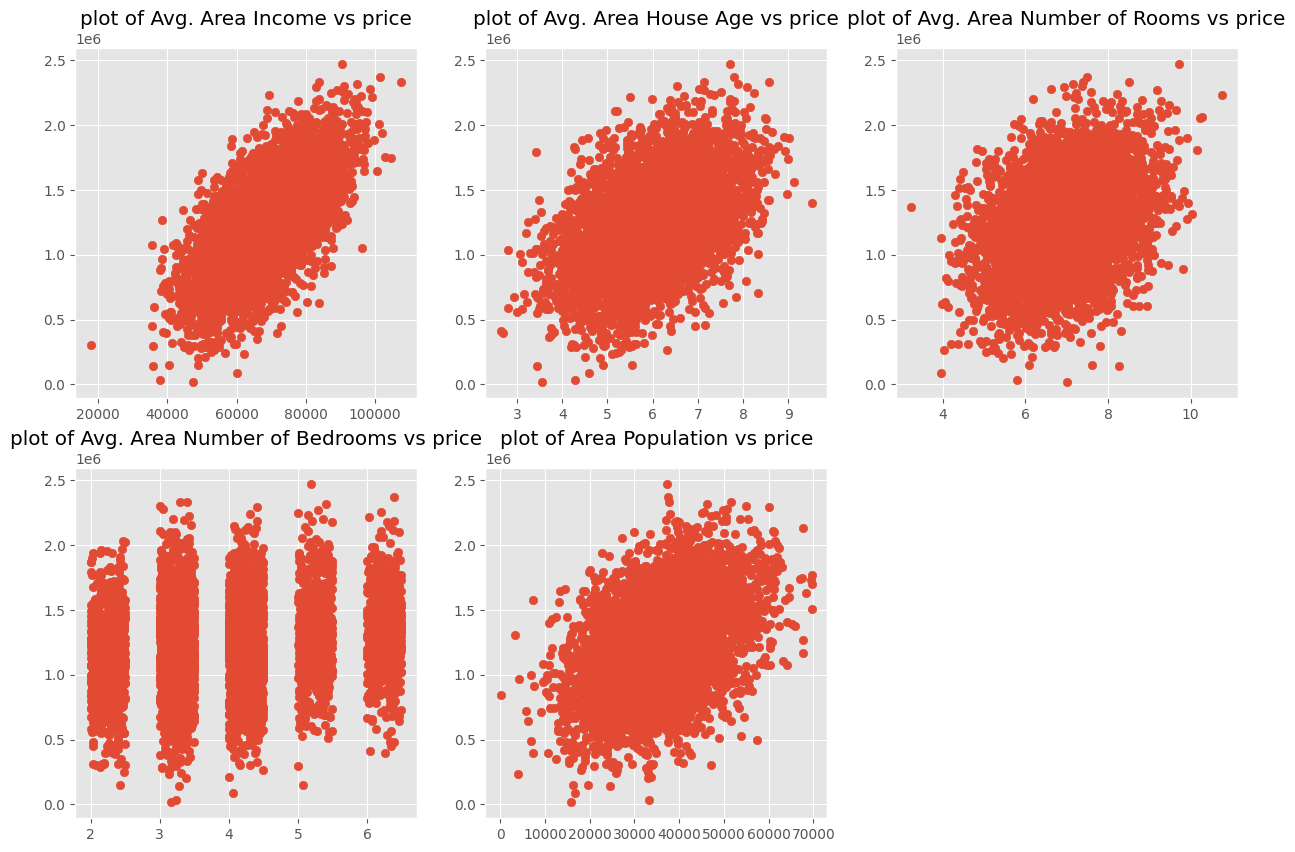

In [12]:
plt.figure(figsize=(15,10))
j = 1
for i in df.columns:
    if(i != 'Price'):
        plt.subplot(2,3,j)
        plt.scatter(x=i, y='Price', data=df)
        plt.title(f"plot of {i} vs price")
        j = j+1
        

In [13]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

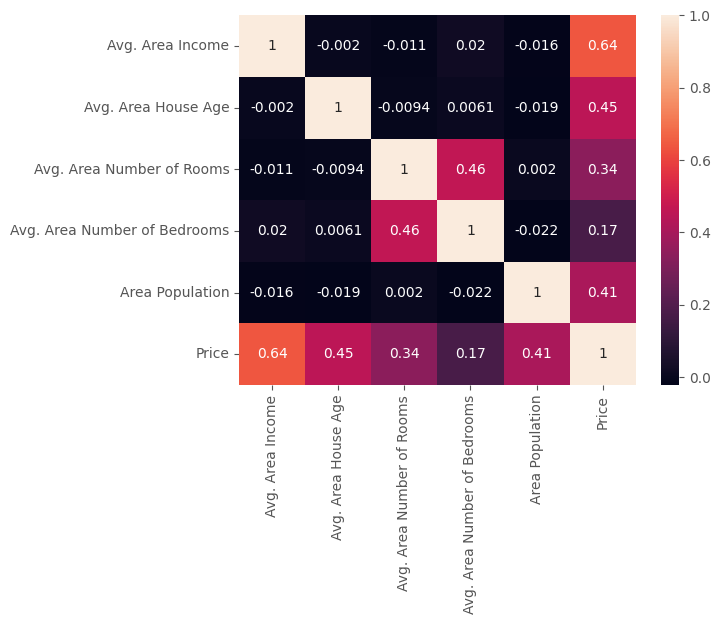

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [18]:
model= LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)

In [22]:
r2_score(y_test, predictions)

0.9186781810243443

In [23]:
np.sqrt(mean_squared_error(y_test, predictions))

98873.68195874771

In [24]:
residuals = y_test - predictions

<Axes: xlabel='Price', ylabel='Density'>

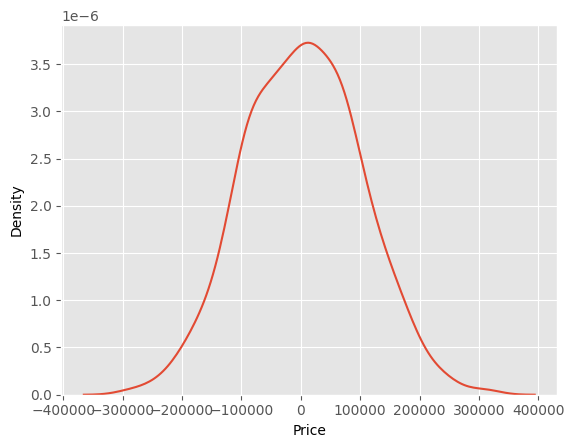

In [25]:
sns.kdeplot(residuals)

<Axes: xlabel='Price', ylabel='Price'>

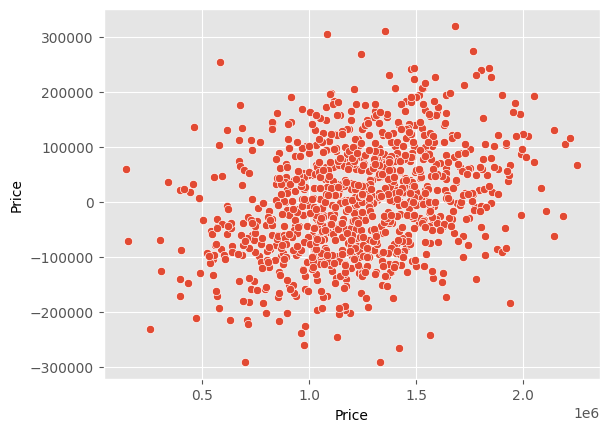

In [26]:
sns.scatterplot(x=y_test, y=residuals)

In [27]:
X_train_sa = X_train
X_train_sa = sa.add_constant(X_train_sa)
lm1 = sa.OLS(y_train, X_train_sa).fit()
lm1.params

const                          -2.628436e+06
Avg. Area Income                2.154235e+01
Avg. Area House Age             1.648239e+05
Avg. Area Number of Rooms       1.198076e+05
Avg. Area Number of Bedrooms    2.315743e+03
Area Population                 1.522958e+01
dtype: float64

In [28]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8924.
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:15:20   Log-Likelihood:                -51793.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.628e+06   1.92e+04   -136.753      0.000   -2.67e+06   -2.59e+06
Avg. Area Income                21.5423      0.150    143.544      0.000      21.248      21.837
Avg. Area House Age           1.648e+05   1615.193    102.046      0.000    1.62e+05    1.68e+05
Avg. Area Number of Rooms     1.198e+05   1797.461     66.654      0.000    1.16e+05    1.23e+05
Avg. Area Number of Bedrooms  2315.7432   1480.323      1.564      0.118    -586.516    5218.002
Area Population                 15.2296      0.161     94.307      0.000      14.913      15.546
==============================================================================
Omnibus:                        5.225   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.589
Skew:                           0.002   Prob(JB):                        0.101
Kurtosis:                       2.834   Cond. No.                     9.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X = df.drop(columns=['Avg. Area Number of Bedrooms', 'Price'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [33]:
model1 = LinearRegression()

In [34]:
model1.fit(X_train,y_train)

LinearRegression()

In [36]:
predictions = model1.predict(X_test)

In [37]:
r2_score(y_test, predictions)

0.9187726447439605

In [38]:
np.sqrt(mean_squared_error(y_test, predictions))

98816.23925885757

In [40]:
X_train_sa = X_train
X_train_sa = sa.add_constant(X_train_sa)
lm2 = sa.OLS(y_train, X_train_sa).fit()

In [41]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:21:55   Log-Likelihood:                -51794.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3995   BIC:                         1.036e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.628e+06   1.92e+04   -136.722      0.000   -2.67e+06   -2.59e+06
Avg. Area Income             21.5455      0.150    143.552      0.000      21.251      21.840
Avg. Area House Age        1.648e+05   1615.428    102.044      0.000    1.62e+05    1.68e+05
Avg. Area Number of Rooms  1.211e+05   1596.528     75.852      0.000    1.18e+05    1.24e+05
Area Population              15.2208      0.161     94.293      0.000      14.904      15.537
==============================================================================
Omnibus:                        4.978   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.395
Skew:                           0.003   Prob(JB):                        0.111
Kurtosis:                       2.838   Cond. No.                     9.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
residuals = y_test - predictions

<Axes: xlabel='Price'>

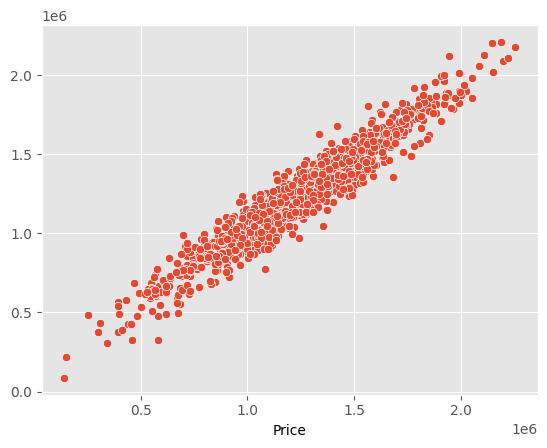

In [43]:
sns.scatterplot(x=y_test, y=predictions)